https://github.com/pymc-devs/pymc3/pull/2876

In [133]:
import pandas as pd
data = pd.read_table(pm.get_data('efron-morris-75-data.tsv'), sep="\t")
at_bats, hits = data[['At-Bats', 'Hits']].values.T
N = len(hits)

with pm.Model() as model:
    phi = pm.Beta('phi', alpha=1., beta=1.)

    kappa_log = pm.Exponential('kappa_log', lam=5.)
    kappa = pm.Deterministic('kappa', tt.exp(kappa_log))

    thetas = pm.Beta('thetas', alpha=phi*kappa, beta=(1.0-phi)*kappa, shape=N)

    y = pm.Binomial('y', n=at_bats, p=thetas, shape=N, observed=hits)
    p = pm.sample_generative()

In [134]:
names = pm.util.get_default_varnames(model.named_vars, include_transformed=False)
names

['phi', 'kappa_log', 'kappa', 'y', 'thetas']

In [136]:
y.random(point=model.test_point, size=1000)

array([[ 0,  1,  9, ..., 22, 35, 40],
       [ 0,  5,  8, ..., 23, 34, 43],
       [ 0,  4,  9, ..., 19, 36, 38],
       ...,
       [ 0,  4,  5, ..., 20, 32, 42],
       [ 0,  2, 15, ..., 21, 34, 44],
       [ 0,  1,  8, ..., 18, 34, 42]])

In [138]:
np.random.binomial(45, thetas.tag.test_value, size=(1000, N))

array([[21, 18, 19, ..., 23, 16, 24],
       [26, 23, 24, ..., 24, 23, 22],
       [25, 24, 23, ..., 19, 24, 21],
       ...,
       [22, 21, 24, ..., 28, 26, 22],
       [26, 21, 25, ..., 19, 28, 20],
       [22, 22, 23, ..., 23, 22, 25]])

In [112]:
names = ['phi', 'kappa_log', 'kappa', 'thetas', 'y']
values = pm.distributions.draw_values([model[name] for name in names], size=100)
p = {k: v for k, v in zip(names, values)}

(array([85., 10.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00392812, 1.41462059, 1.82531307, 2.23600555, 2.64669803,
        3.05739051, 3.46808299, 3.87877547, 4.28946795, 4.70016043,
        5.11085291]),
 <a list of 10 Patch objects>)

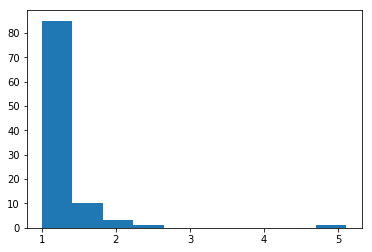

In [113]:
plt.hist(p['kappa'])

([array([93.,  1.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
  array([86.,  2.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  1.]),
  array([90.,  2.,  3.,  1.,  0.,  2.,  2.,  0.,  0.,  0.]),
  array([87.,  5.,  1.,  0.,  4.,  2.,  1.,  0.,  0.,  0.]),
  array([83.,  5.,  3.,  1.,  4.,  2.,  0.,  1.,  0.,  1.]),
  array([93.,  3.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([87.,  2.,  3.,  1.,  3.,  0.,  0.,  2.,  1.,  1.]),
  array([91.,  1.,  2.,  2.,  0.,  2.,  1.,  1.,  0.,  0.]),
  array([87.,  2.,  0.,  1.,  2.,  2.,  1.,  2.,  2.,  1.]),
  array([90.,  3.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  2.]),
  array([87.,  5.,  2.,  2.,  1.,  2.,  0.,  1.,  0.,  0.]),
  array([87.,  4.,  3.,  2.,  0.,  2.,  0.,  2.,  0.,  0.]),
  array([92.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([82.,  3.,  4.,  5.,  1.,  1.,  2.,  0.,  2.,  0.]),
  array([92.,  2.,  0.,  1.,  1.,  1.,  1.,  0.,  2.,  0.]),
  array([89.,  1.,  4.,  2.,  1.,  1.,  1.,  1.,  0.,  0.]),
  array([76.,  3.,  6., 

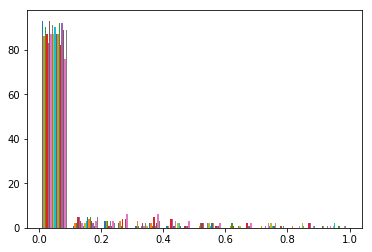

In [114]:
plt.hist(p['thetas'])

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]),
  array([25., 56., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]),
  array([99.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([35., 60.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  2., 17., 59., 22.,  0.,  0.]),
  array([45., 47.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([77., 23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  1., 25., 53., 20.,  1.]),
  array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 0.,  0.,  9., 49., 37.,  4.,  1.,  0.,  0.,  0.]),
  array([ 5., 53., 40.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  1., 36., 44., 19.,  0.]),
  array([100.,   0.,   0.,   0.,   

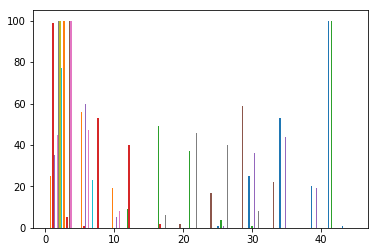

In [115]:
plt.hist(p['y'])

In [37]:
p['thetas'][0]

array([0.91477783, 0.39240297, 0.6024818 , 0.0103198 , 0.79405848,
       0.9929097 , 0.00577799, 0.43283732, 0.99716879, 0.6392796 ,
       0.1146776 , 0.04013293, 0.63416813, 0.97917682, 0.93176632,
       0.96075654, 0.99684358, 0.99951873])

In [38]:
p['y'][0]

array([37, 35, 38, 40, 19, 41, 21, 30, 24, 30,  9,  8, 28, 24, 12, 23, 38,
       37])

In [39]:
at_bats

array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45])

In [40]:
p['thetas'].mean(axis=0) * at_bats

array([27.47100009, 23.83029218, 25.78158732, 26.95062942, 27.04525637,
       23.06370188, 25.16237956, 25.68327175, 23.42492362, 26.19416057,
       26.98748906, 26.62710342, 26.14017732, 24.10210065, 28.49715339,
       26.18484643, 27.48694141, 26.58925918])

In [41]:
p['y'].mean(axis=0)

array([34.63, 32.44, 35.2 , 39.57, 14.82, 41.52, 24.7 , 33.13, 26.62,
       31.54,  8.82,  7.62, 23.98, 23.06, 15.15, 27.18, 37.91, 38.79])